In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('NewResults')

In [3]:
for exl in os.listdir('.'):
    if exl.endswith('.xlsx'):
        df = pd.read_excel(exl)
        
        cur_max = np.zeros(len(df['NAV']), dtype=np.float64)
        drawdown = np.zeros(len(df['NAV']), dtype=np.float64)
        for i, val in enumerate(df['NAV']):
            if i == 0:
                cur_max[i] = val
            else:
                cur_max[i] = max(val, cur_max[i-1])
            drawdown[i] = (val - cur_max[i]) / cur_max[i]
        print(exl + ":", np.max(drawdown*-100))
        
            

Lookback_21_Holding_21.xlsx: 67.9035495878
Lookback_21_Holding_7.xlsx: 51.04801985118118
Lookback_63_Holding_7.xlsx: 52.616483812315096
Lookback_126_Holding_21.xlsx: 46.81176937574748
Lookback_252_Holding_21.xlsx: 46.73033221201765
Lookback_63_Holding_21.xlsx: 44.76004124665244
Lookback_7_Holding_7.xlsx: 63.2014697097618



 Lookback_21_Holding_21.xlsx


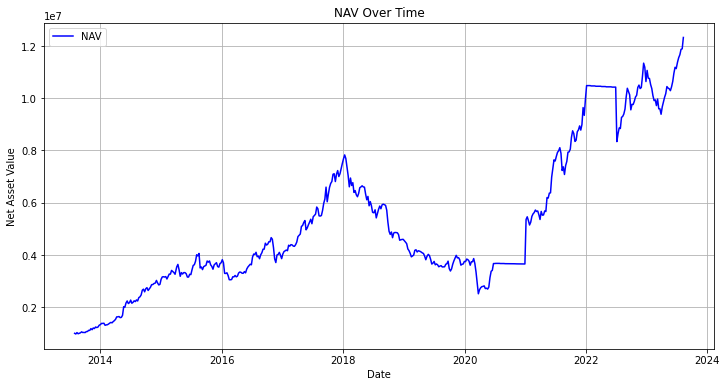

Sharpe Ratio: 2.206566471261386
Sortino Ratio: 3.14268830607502

 Lookback_21_Holding_7.xlsx


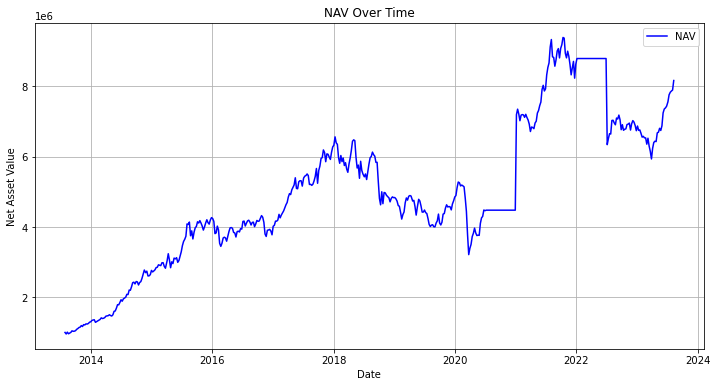

Sharpe Ratio: 1.8182699265366196
Sortino Ratio: 2.5060005333334274

 Lookback_63_Holding_7.xlsx


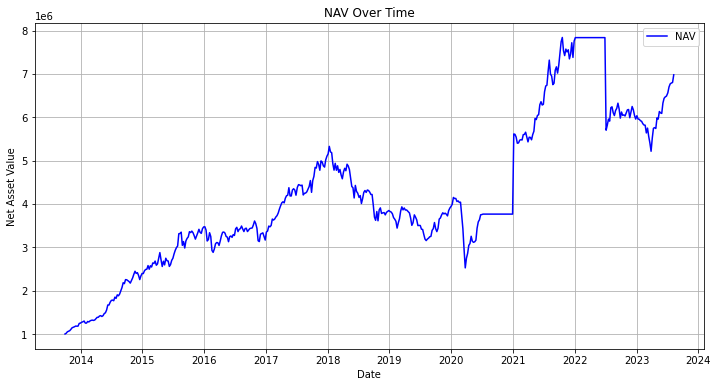

Sharpe Ratio: 1.8853939704897453
Sortino Ratio: 2.445886484611842

 Lookback_126_Holding_21.xlsx


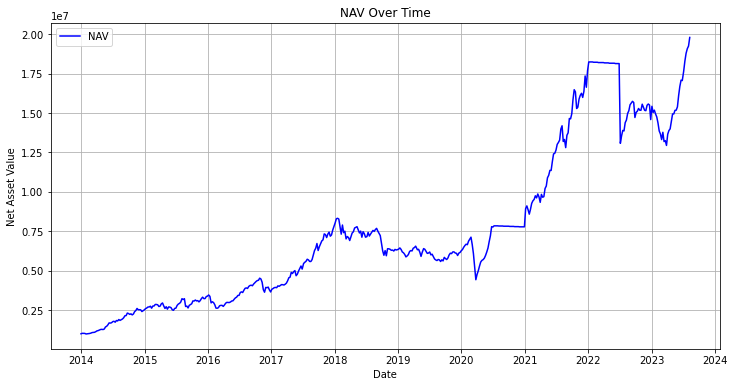

Sharpe Ratio: 2.9588500224093757
Sortino Ratio: 3.0973093892318166

 Lookback_252_Holding_21.xlsx


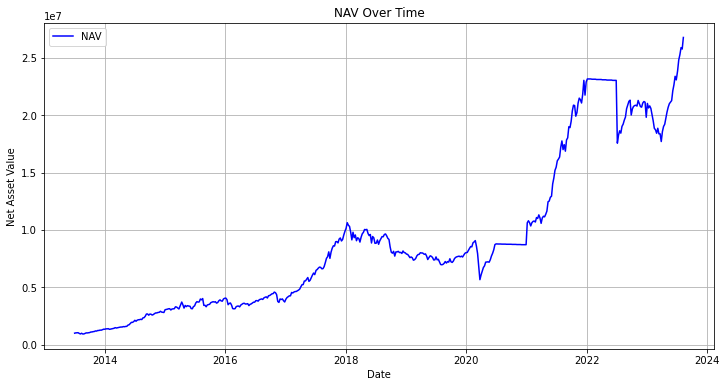

Sharpe Ratio: 3.0944379058851874
Sortino Ratio: 3.3367064106524964

 Lookback_63_Holding_21.xlsx


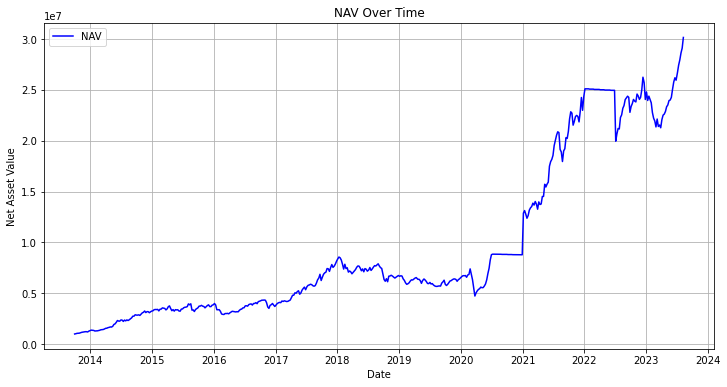

Sharpe Ratio: 2.9217874038246485
Sortino Ratio: 3.901882944029689

 Lookback_7_Holding_7.xlsx


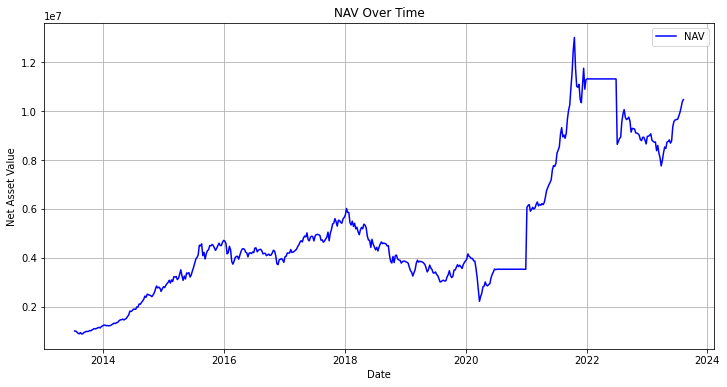

Sharpe Ratio: 1.8369127346827614
Sortino Ratio: 2.834765234083305


In [4]:
for exl in os.listdir('.'):
    if exl.endswith('.xlsx'):
        print("\n", exl)
        # Read the Excel file
        # Assuming the file has a 'Date' column and a 'NAV' column
        nav_data = pd.read_excel(exl, index_col='Date', parse_dates=True)

        # Convert index and NAV values to numpy arrays
        dates = nav_data.index.to_numpy()
        nav_values = nav_data['NAV'].to_numpy()

        # Plot NAV over time
        plt.figure(figsize=(12, 6))
        plt.plot(dates, nav_values, label='NAV', color='blue')
        plt.title('NAV Over Time')
        plt.xlabel('Date')
        plt.ylabel('Net Asset Value')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Calculate Sharpe Ratio
        # Assuming a risk-free rate of 0%
        daily_returns = nav_data['NAV'].pct_change().dropna()
        sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)  # Annualized

        # Calculate Sortino Ratio
        # Assuming a risk-free rate of 0% and focusing only on the downside
        negative_returns = daily_returns[daily_returns < 0]
        sortino_ratio = daily_returns.mean() / negative_returns.std() * np.sqrt(252)  # Annualized

        print(f"Sharpe Ratio: {sharpe_ratio}")
        print(f"Sortino Ratio: {sortino_ratio}")
